In [1]:
from field_of_view import FieldOfView
from clusters import ClusterParam, Cluster

import numpy as np
from matplotlib import pyplot as plt

import statistics
import math as m

In [2]:
nm_per_pixel = 21.34
time_per_frame = 0.1
Tau_D_7xR3 = 150.32
Tau_D_16xR1 = 97
background_threshold = 500
deepd3_path = 'DeepD3_32F.h5'

In [3]:
path_list_GLUA1_7xR3 = ["0317_B2_", "0317_B3_", "0317_C1_", "0522_B1_", "0522_B2_", "1123_B1_", "1123_B2_"]
path_list_GLUA2_7xR3 = ["0317_A1_", "0317_D1_", "0317_D2_", "0522_A1_", "1027_A1_", "1218_A1_"]
path_list_GLUA1_16xR1 = ["0317_A1_", "0317_D1_", "0317_D2_", "0522_A1_", "1027_A1_", "1218_A1_"]
path_list_GLUA2_16xR1 = ["0317_B2_", "0317_B3_", "0317_C1_", "0522_B1_", "0522_B2_", "1123_B1_", "1123_B2_"]
path_lists = [path_list_GLUA1_7xR3, path_list_GLUA2_7xR3, path_list_GLUA1_16xR1, path_list_GLUA2_16xR1]
point_wrappers = [["Data/7xR3/", "GluA1", "_corrected.csv", Tau_D_7xR3], ["Data/7xR3/", "GluA2", "_corrected.csv", Tau_D_7xR3], 
                  ["Data/16xR1/", "GluA1", "_corrected.csv", Tau_D_16xR1], ["Data/16xR1/", "GluA2", "_corrected.csv", Tau_D_16xR1]]

In [4]:
# Define as dictionaries with ClusterParams as labels
GLUA1_7xR3_sizes = {}
GLUA1_7xR3_areas = {}
GLUA1_7xR3_densities = {}
GLUA1_7xR3_distances = {}
GLUA2_7xR3_sizes = {}
GLUA2_7xR3_areas = {}
GLUA2_7xR3_densities = {}
GLUA2_7xR3_distances = {}
GLUA1_16xR1_sizes = {}
GLUA1_16xR1_areas = {}
GLUA1_16xR1_densities = {}
GLUA1_16xR1_distances = {}
GLUA2_16xR1_sizes = {}
GLUA2_16xR1_areas = {}
GLUA2_16xR1_densities = {}
GLUA2_16xR1_distances = {}
all_sizes = [GLUA1_7xR3_sizes, GLUA2_7xR3_sizes, GLUA1_16xR1_sizes, GLUA2_16xR1_sizes]
all_areas = [GLUA1_7xR3_areas, GLUA2_7xR3_areas, GLUA1_16xR1_areas, GLUA2_16xR1_areas]
all_densities = [GLUA1_7xR3_densities, GLUA2_7xR3_densities, GLUA1_16xR1_densities, GLUA2_16xR1_densities]
all_distances = [GLUA1_7xR3_distances, GLUA2_7xR3_distances, GLUA1_16xR1_distances, GLUA2_16xR1_distances]

In [5]:
FOVs_GLUA1_7xR3 = []
FOVs_GLUA2_7xR3 = []
FOVs_GLUA1_16xR1 = []
FOVs_GLUA2_16xR1 = []
FOVs = [FOVs_GLUA1_7xR3, FOVs_GLUA2_7xR3, FOVs_GLUA1_16xR1, FOVs_GLUA2_16xR1]
for i in range(len(FOVs)):
    path_list = path_lists[i]
    FOV_list = FOVs[i]
    for path in path_list:
        homer_path = "Data/Homer/" + path + "aHomer_corrected.csv"
        life_act_path = "Data/LifeAct/" + path + "Composite.tif"
        point_path = point_wrappers[i][0] + path + point_wrappers[i][1] + point_wrappers[i][2]
        points = [[point_wrappers[i][1], point_path, 'white', time_per_frame, point_wrappers[i][3]]]
        Params = [ClusterParam(25, 15, point_wrappers[i][1])]
        FOV = FieldOfView(homer_centers=homer_path, 
                          life_act=life_act_path, 
                          nm_per_pixel=nm_per_pixel,
                          points=points, 
                          Params=Params, 
                          threshold=background_threshold,
                          deepd3_model_path=deepd3_path,
                          deepd3_pred_thresh=0.1)
        FOV_list.append(FOV)
# Expected Processing Time: 8min

Loading Life Act...
Setting up Thresholding...
1/1 [==============================] - 3s 3s/step
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Loading Homer Centers...
Loading GluA1...
Finding Clusters for: GluA1(eps=25, min_samples=15)...
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


: 

In [6]:
import pickle as pkl
# with open('DockerTestingFOVs.pkl', 'wb') as file:
#     pkl.dump(FOVs, file)
with open('DockerTestingFOVs.pkl', 'rb') as file:
    FOVs = pkl.load(file)


In [38]:
max_dark_time = 500
for i in range(len(FOVs)):
    path_list = path_lists[i]
    FOV_list = FOVs[i]
    point_wrapper = point_wrappers[i]
    sizes = all_sizes[i]
    areas = all_areas[i]
    densities = all_densities[i]
    distances = all_distances[i]
    Params = [ClusterParam(25, 15, point_wrapper[1]),
              ClusterParam(25, 25, point_wrapper[1]),
              ClusterParam(25, 50, point_wrapper[1]),
              ClusterParam(25, 75, point_wrapper[1]),]
    for j in range(len(Params)):
        Param = Params[j]
        sizes[Param] = []
        areas[Param] = []
        densities[Param] = []
        distances[Param] = []
        for k in range(len(FOV_list)):
            FOV = FOV_list[k]
            sizes[Param].extend(FOV.get_all_cluster_sizes(Param, max_dark_time=max_dark_time))
            areas[Param].extend(FOV.get_all_cluster_areas(Param, max_dark_time=max_dark_time))
            densities[Param].extend(FOV.get_all_cluster_densities(Param, max_dark_time=max_dark_time))
            distances[Param].extend(FOV.get_all_distances_to_homer(Param, max_dark_time=max_dark_time))
            
        

In [40]:
Params = [ClusterParam(25, 15, 'GluA1'),
          ClusterParam(25, 25, 'GluA1'),
          ClusterParam(25, 50, 'GluA1'),
          ClusterParam(25, 75, 'GluA1'),
          ClusterParam(25, 15, 'GluA2'),
          ClusterParam(25, 25, 'GluA2'),
          ClusterParam(25, 50, 'GluA2'),
          ClusterParam(25, 75, 'GluA2'),]

In [42]:
def moving_average(x, y, window_size):
    """
    Calculate the moving average of the y-values, using a given window size.
    """
    # Sort x and y by x-values
    sorted_indices = np.argsort(x)
    x_sorted = x[sorted_indices]
    y_sorted = y[sorted_indices]

    # Compute moving averages
    moving_averages = []
    moving_averages_x = []

    # Use a deque (double-ended queue) to store the values in the current window
    from collections import deque
    window = deque(maxlen=window_size)  # Only holds `window_size` number of elements

    # Use the index of the sorted x-values to iterate and calculate the moving average
    for i in range(len(x_sorted)):
        # Append the next y-value to the window
        window.append(y_sorted[i])

        # Calculate the mean of the current window
        window_mean = np.mean(window)

        # Store the moving average and corresponding x-value
        moving_averages.append(window_mean)
        moving_averages_x.append(x_sorted[i])

    return moving_averages_x, moving_averages

Number of datapoints for 7xR3 (Param: GluA1(eps=25, min_samples=15)): 32
Number of datapoints for 16xR1 (Param: GluA1(eps=25, min_samples=15)): 113


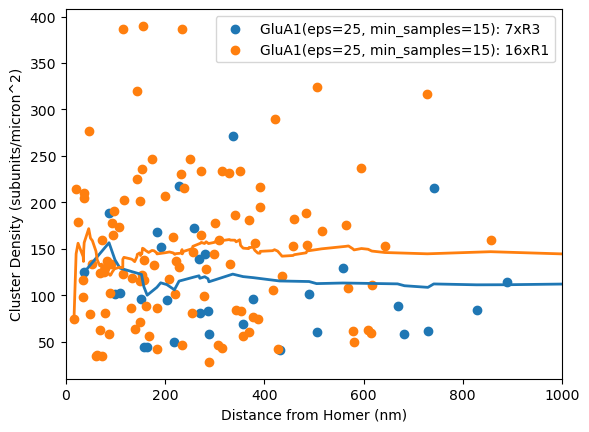

In [93]:
# Comparing dockers with GLUA1 7xR3 vs 16xR1
Param7xR3 = Params[0]
Param16xR1 = Params[0]
print(f"Number of datapoints for 7xR3 (Param: {Param7xR3}): {len(GLUA1_7xR3_densities[Param7xR3])}")
print(f"Number of datapoints for 16xR1 (Param: {Param16xR1}): {len(GLUA1_16xR1_densities[Param16xR1])}")

window = 50
GLUA1_7xR3_average_distances, GLUA1_7xR3_average_densities = moving_average(np.array(GLUA1_7xR3_distances[Param7xR3]), np.array(GLUA1_7xR3_densities[Param7xR3]), window)
GLUA1_16xR1_average_distances, GLUA1_16xR1_average_densities = moving_average(np.array(GLUA1_16xR1_distances[Param16xR1]), np.array(GLUA1_16xR1_densities[Param16xR1]), window)

plt.figure()
plt.scatter(GLUA1_7xR3_distances[Param7xR3], GLUA1_7xR3_densities[Param7xR3], label=f"{Param7xR3}: 7xR3")
plt.plot(GLUA1_7xR3_average_distances, GLUA1_7xR3_average_densities, color='tab:blue', linestyle='-', linewidth=2)  # Plot the moving average line

plt.scatter(GLUA1_16xR1_distances[Param16xR1], GLUA1_16xR1_densities[Param16xR1], label=f"{Param16xR1}: 16xR1")
plt.plot(GLUA1_16xR1_average_distances, GLUA1_16xR1_average_densities, color='tab:orange', linestyle='-', linewidth=2)  # Plot the moving average line

plt.ylabel("Cluster Density (subunits/micron^2)")
plt.xlabel("Distance from Homer (nm)")
plt.legend()

plt.xlim(0, 1000)
plt.show()

Number of datapoints for 7xR3 (Param: GluA2(eps=25, min_samples=15)): 294
Number of datapoints for 16xR1 (Param: GluA2(eps=25, min_samples=15)): 457

Mean for 7xR3: 194.53514304746798
SEOTM for 7xR3: 7.642329961557421

Mean for 16xR1: 158.97380290198274
SEOTM for 16xR1: 4.801315589988263


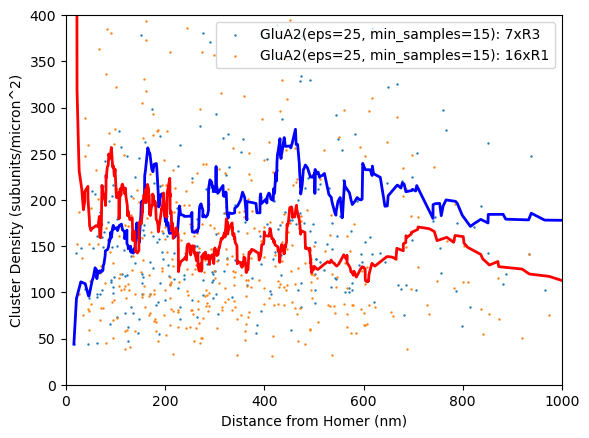

In [127]:
# Comparing dockers with GLUA2 7xR3 vs 16xR1
Param7xR3 = Params[4]
Param16xR1 = Params[4]

max_density = 1000
filtered_GLUA2_7xR3_densities = [density for density in GLUA2_7xR3_densities[Param7xR3] if density < max_density]
filtered_GLUA2_7xR3_distances = [GLUA2_7xR3_distances[Param7xR3][i] for i in range(len(GLUA2_7xR3_distances[Param7xR3])) 
                                 if GLUA2_7xR3_densities[Param7xR3][i] < max_density]
filtered_GLUA2_16xR1_densities = [density for density in GLUA2_16xR1_densities[Param16xR1] if density < max_density]
filtered_GLUA2_16xR1_distances = [GLUA2_16xR1_distances[Param16xR1][i] for i in range(len(GLUA2_16xR1_distances[Param16xR1])) 
                                 if GLUA2_16xR1_densities[Param16xR1][i] < max_density]

print(f"Number of datapoints for 7xR3 (Param: {Param7xR3}): {len(filtered_GLUA2_7xR3_densities)}")
print(f"Number of datapoints for 16xR1 (Param: {Param16xR1}): {len(filtered_GLUA2_16xR1_densities)}\n")

sum = 0
for i in range(len(filtered_GLUA2_7xR3_densities)):
    sum += filtered_GLUA2_7xR3_densities[i]
print(f"Mean for 7xR3: {sum/len(filtered_GLUA2_7xR3_densities)}")
print(f"SEOTM for 7xR3: {statistics.stdev(filtered_GLUA2_7xR3_densities)/m.sqrt(len(filtered_GLUA2_7xR3_densities))}\n")
sum = 0

for i in range(len(filtered_GLUA2_16xR1_densities)):
    sum += filtered_GLUA2_16xR1_densities[i]
print(f"Mean for 16xR1: {sum/len(filtered_GLUA2_16xR1_densities)}")
print(f"SEOTM for 16xR1: {statistics.stdev(filtered_GLUA2_16xR1_densities)/m.sqrt(len(filtered_GLUA2_16xR1_densities))}")

window = 20
GLUA2_7xR3_average_distances, GLUA2_7xR3_average_densities = moving_average(np.array(filtered_GLUA2_7xR3_distances), np.array(filtered_GLUA2_7xR3_densities), window)
GLUA2_16xR1_average_distances, GLUA2_16xR1_average_densities = moving_average(np.array(filtered_GLUA2_16xR1_distances), np.array(filtered_GLUA2_16xR1_densities), window)

plt.figure()
plt.scatter(filtered_GLUA2_7xR3_distances, filtered_GLUA2_7xR3_densities, s=0.5, label=f"{Param7xR3}: 7xR3")
plt.scatter(filtered_GLUA2_16xR1_distances, filtered_GLUA2_16xR1_densities, s=0.5,  label=f"{Param16xR1}: 16xR1")

plt.plot(GLUA2_7xR3_average_distances, GLUA2_7xR3_average_densities, color='blue', linestyle='-', linewidth=2)  # Plot the moving average line
plt.plot(GLUA2_16xR1_average_distances, GLUA2_16xR1_average_densities, color='red', linestyle='-', linewidth=2)  # Plot the moving average line

plt.ylabel("Cluster Density (subunits/micron^2)")
plt.xlabel("Distance from Homer (nm)")
plt.legend()

plt.ylim(0, 400)
plt.xlim(0, 1000)
plt.show()

Number of datapoints for 7xR3 (Param: GluA2(eps=25, min_samples=15)): 294
Number of datapoints for 16xR1 (Param: GluA2(eps=25, min_samples=25)): 452


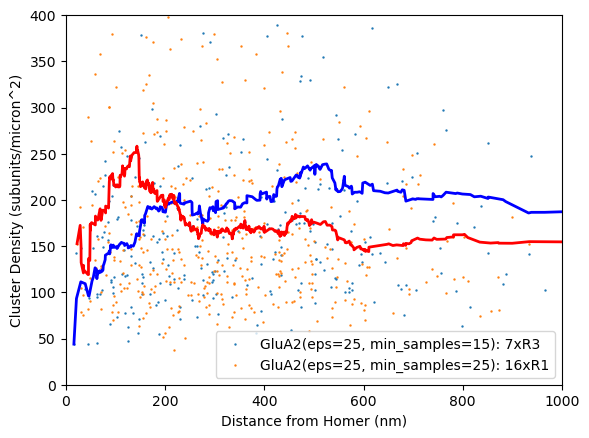

In [113]:
# Comparing dockers with GLUA2 7xR3 vs 16xR1
Param7xR3 = Params[4]
Param16xR1 = Params[5]

max_density = 1000
filtered_GLUA2_7xR3_densities = [density for density in GLUA2_7xR3_densities[Param7xR3] if density < max_density]
filtered_GLUA2_7xR3_distances = [GLUA2_7xR3_distances[Param7xR3][i] for i in range(len(GLUA2_7xR3_distances[Param7xR3])) 
                                 if GLUA2_7xR3_densities[Param7xR3][i] < max_density]
filtered_GLUA2_16xR1_densities = [density for density in GLUA2_16xR1_densities[Param16xR1] if density < max_density]
filtered_GLUA2_16xR1_distances = [GLUA2_16xR1_distances[Param16xR1][i] for i in range(len(GLUA2_16xR1_distances[Param16xR1])) 
                                 if GLUA2_16xR1_densities[Param16xR1][i] < max_density]

print(f"Number of datapoints for 7xR3 (Param: {Param7xR3}): {len(filtered_GLUA2_7xR3_densities)}")
print(f"Number of datapoints for 16xR1 (Param: {Param16xR1}): {len(filtered_GLUA2_16xR1_densities)}")

sum = 0
for i in range(len(filtered_GLUA2_7xR3_densities)):
    sum += filtered_GLUA2_7xR3_densities[i]
print(f"Mean for 7xR3: {sum/len(filtered_GLUA2_7xR3_densities)}")
print(f"SEOTM for 7xR3: {statistics.stdev(filtered_GLUA2_7xR3_densities)/m.sqrt(len(filtered_GLUA2_7xR3_densities))}\n")
sum = 0

for i in range(len(filtered_GLUA2_16xR1_densities)):
    sum += filtered_GLUA2_16xR1_densities[i]
print(f"Mean for 16xR1: {sum/len(filtered_GLUA2_16xR1_densities)}")
print(f"SEOTM for 16xR1: {statistics.stdev(filtered_GLUA2_16xR1_densities)/m.sqrt(len(filtered_GLUA2_16xR1_densities))}")

window = 50
GLUA2_7xR3_average_distances, GLUA2_7xR3_average_densities = moving_average(np.array(filtered_GLUA2_7xR3_distances), np.array(filtered_GLUA2_7xR3_densities), window)
GLUA2_16xR1_average_distances, GLUA2_16xR1_average_densities = moving_average(np.array(filtered_GLUA2_16xR1_distances), np.array(filtered_GLUA2_16xR1_densities), window)

plt.figure()
plt.scatter(filtered_GLUA2_7xR3_distances, filtered_GLUA2_7xR3_densities, s=0.5, label=f"{Param7xR3}: 7xR3")
plt.scatter(filtered_GLUA2_16xR1_distances, filtered_GLUA2_16xR1_densities, s=0.5,  label=f"{Param16xR1}: 16xR1")

plt.plot(GLUA2_7xR3_average_distances, GLUA2_7xR3_average_densities, color='blue', linestyle='-', linewidth=2)  # Plot the moving average line
plt.plot(GLUA2_16xR1_average_distances, GLUA2_16xR1_average_densities, color='red', linestyle='-', linewidth=2)  # Plot the moving average line

plt.ylabel("Cluster Density (subunits/micron^2)")
plt.xlabel("Distance from Homer (nm)")
plt.legend()

plt.ylim(0, 400)
plt.xlim(0, 1000)
plt.show()

Number of datapoints for 7xR3 (Param: GluA2(eps=25, min_samples=15)): 294
Number of datapoints for 16xR1 (Param: GluA2(eps=25, min_samples=50)): 407

Mean for 7xR3: 194.53514304746798
SEOTM for 7xR3: 7.642329961557421

Mean for 16xR1: 218.49798930463942
SEOTM for 16xR1: 5.260351410210305


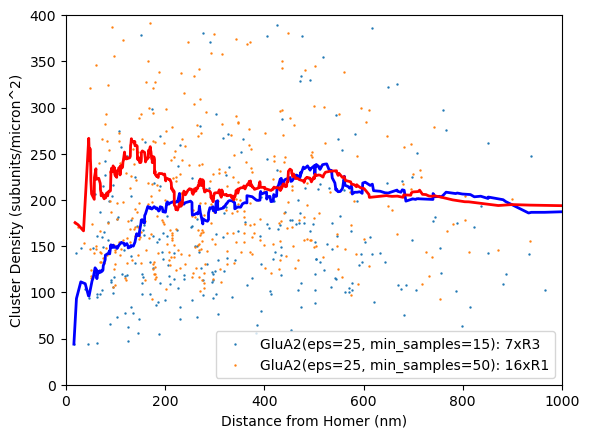

In [125]:
# Comparing dockers with GLUA1 7xR3 vs 16xR1
Param7xR3 = Params[4]
Param16xR1 = Params[6]

max_density = 1000
filtered_GLUA2_7xR3_densities = [density for density in GLUA2_7xR3_densities[Param7xR3] if density < max_density]
filtered_GLUA2_7xR3_distances = [GLUA2_7xR3_distances[Param7xR3][i] for i in range(len(GLUA2_7xR3_distances[Param7xR3])) 
                                 if GLUA2_7xR3_densities[Param7xR3][i] < max_density]
filtered_GLUA2_16xR1_densities = [density for density in GLUA2_16xR1_densities[Param16xR1] if density < max_density]
filtered_GLUA2_16xR1_distances = [GLUA2_16xR1_distances[Param16xR1][i] for i in range(len(GLUA2_16xR1_distances[Param16xR1])) 
                                 if GLUA2_16xR1_densities[Param16xR1][i] < max_density]


print(f"Number of datapoints for 7xR3 (Param: {Param7xR3}): {len(filtered_GLUA2_7xR3_densities)}")
print(f"Number of datapoints for 16xR1 (Param: {Param16xR1}): {len(filtered_GLUA2_16xR1_densities)}\n")
sum = 0
for i in range(len(filtered_GLUA2_7xR3_densities)):
    sum += filtered_GLUA2_7xR3_densities[i]
print(f"Mean for 7xR3: {sum/len(filtered_GLUA2_7xR3_densities)}")
print(f"SEOTM for 7xR3: {statistics.stdev(filtered_GLUA2_7xR3_densities)/m.sqrt(len(filtered_GLUA2_7xR3_densities))}\n")
sum = 0
for i in range(len(filtered_GLUA2_16xR1_densities)):
    sum += filtered_GLUA2_16xR1_densities[i]
print(f"Mean for 16xR1: {sum/len(filtered_GLUA2_16xR1_densities)}")
print(f"SEOTM for 16xR1: {statistics.stdev(filtered_GLUA2_16xR1_densities)/m.sqrt(len(filtered_GLUA2_16xR1_densities))}")
window = 50
GLUA2_7xR3_average_distances, GLUA2_7xR3_average_densities = moving_average(np.array(filtered_GLUA2_7xR3_distances), np.array(filtered_GLUA2_7xR3_densities), window)
GLUA2_16xR1_average_distances, GLUA2_16xR1_average_densities = moving_average(np.array(filtered_GLUA2_16xR1_distances), np.array(filtered_GLUA2_16xR1_densities), window)

plt.figure()
plt.scatter(filtered_GLUA2_7xR3_distances, filtered_GLUA2_7xR3_densities, s=0.5, label=f"{Param7xR3}: 7xR3")
plt.scatter(filtered_GLUA2_16xR1_distances, filtered_GLUA2_16xR1_densities, s=0.5,  label=f"{Param16xR1}: 16xR1")

plt.plot(GLUA2_7xR3_average_distances, GLUA2_7xR3_average_densities, color='blue', linestyle='-', linewidth=2)  # Plot the moving average line
plt.plot(GLUA2_16xR1_average_distances, GLUA2_16xR1_average_densities, color='red', linestyle='-', linewidth=2)  # Plot the moving average line

plt.ylabel("Cluster Density (subunits/micron^2)")
plt.xlabel("Distance from Homer (nm)")
plt.legend()

plt.ylim(0, 400)
plt.xlim(0, 1000)
plt.show()

Number of datapoints for 7xR3 (Param: GluA1(eps=25, min_samples=15)): 32
Number of datapoints for 16xR1 (Param: GluA1(eps=25, min_samples=15)): 113

Mean for 7xR3: 11.04348799378266
Median for 7xR3: 7.660554167833526
SEOTM for 7xR3: 1.6871063192564737

Mean for 16xR1: 7.892182700315214
Median for 16xR1: 6.131479140328684
SEOTM for 16xR1: 0.5597252681533632


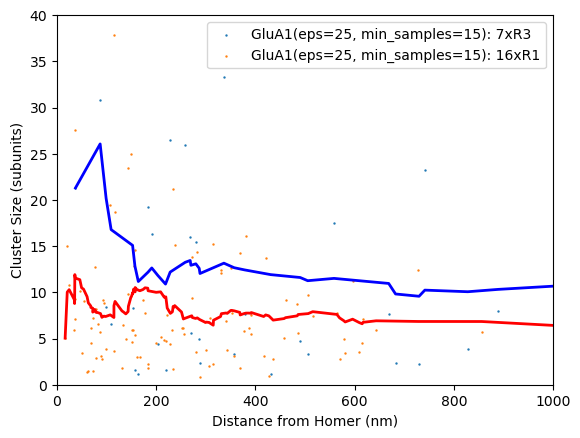

In [156]:
# Comparing sizes with GLUA1 7xR3 vs 16xR1
Param7xR3 = Params[0]
Param16xR1 = Params[0]

max_size = 40
filtered_GLUA1_7xR3_sizes = [size for size in GLUA1_7xR3_sizes[Param7xR3] if size < max_size]
filtered_GLUA1_7xR3_distances = [GLUA1_7xR3_distances[Param7xR3][i] for i in range(len(GLUA1_7xR3_distances[Param7xR3])) 
                                 if GLUA1_7xR3_sizes[Param7xR3][i] < max_size]
filtered_GLUA1_16xR1_sizes = [size for size in GLUA1_16xR1_sizes[Param16xR1] if size < max_size]
filtered_GLUA1_16xR1_distances = [GLUA1_16xR1_distances[Param16xR1][i] for i in range(len(GLUA1_16xR1_distances[Param16xR1])) 
                                 if GLUA1_16xR1_sizes[Param16xR1][i] < max_size]


print(f"Number of datapoints for 7xR3 (Param: {Param7xR3}): {len(filtered_GLUA1_7xR3_sizes)}")
print(f"Number of datapoints for 16xR1 (Param: {Param16xR1}): {len(filtered_GLUA1_16xR1_sizes)}\n")
sum = 0
for i in range(len(filtered_GLUA1_7xR3_sizes)):
    sum += filtered_GLUA1_7xR3_sizes[i]
print(f"Mean for 7xR3: {sum/len(filtered_GLUA1_7xR3_sizes)}")
print(f"Median for 7xR3: {statistics.median(filtered_GLUA1_7xR3_sizes)}")
print(f"SEOTM for 7xR3: {statistics.stdev(filtered_GLUA1_7xR3_sizes)/m.sqrt(len(filtered_GLUA1_7xR3_sizes))}\n")
sum = 0
for i in range(len(filtered_GLUA1_16xR1_sizes)):
    sum += filtered_GLUA1_16xR1_sizes[i]
print(f"Mean for 16xR1: {sum/len(filtered_GLUA1_16xR1_sizes)}")
print(f"Median for 16xR1: {statistics.median(filtered_GLUA1_16xR1_sizes)}")
print(f"SEOTM for 16xR1: {statistics.stdev(filtered_GLUA1_16xR1_sizes)/m.sqrt(len(filtered_GLUA1_16xR1_sizes))}")

window = 25
GLUA1_7xR3_average_distances, GLUA1_7xR3_average_sizes = moving_average(np.array(filtered_GLUA1_7xR3_distances), 
                                                                        np.array(filtered_GLUA1_7xR3_sizes), window)
GLUA1_16xR1_average_distances, GLUA1_16xR1_average_sizes = moving_average(np.array(filtered_GLUA1_16xR1_distances), 
                                                                          np.array(filtered_GLUA1_16xR1_sizes), window)

plt.figure()
plt.scatter(filtered_GLUA1_7xR3_distances, filtered_GLUA1_7xR3_sizes, s=0.5, label=f"{Param7xR3}: 7xR3")
plt.scatter(filtered_GLUA1_16xR1_distances, filtered_GLUA1_16xR1_sizes, s=0.5,  label=f"{Param16xR1}: 16xR1")

plt.plot(GLUA1_7xR3_average_distances, GLUA1_7xR3_average_sizes, color='blue', linestyle='-', linewidth=2)  # Plot the moving average line
plt.plot(GLUA1_16xR1_average_distances, GLUA1_16xR1_average_sizes, color='red', linestyle='-', linewidth=2)  # Plot the moving average line

plt.ylabel("Cluster Size (subunits)")
plt.xlabel("Distance from Homer (nm)")
plt.legend()

plt.ylim(0, 40)
plt.xlim(0, 1000)
plt.show()

Number of datapoints for 7xR3 (Param: GluA2(eps=25, min_samples=15)): 293
Number of datapoints for 16xR1 (Param: GluA2(eps=25, min_samples=15)): 411

Mean for 7xR3: 8.436668852294947
Median for 7xR3: 6.528353393721311
SEOTM for 7xR3: 0.3566800842980557

Mean for 16xR1: 11.138793133162405
Median for 16xR1: 8.748590755355059
SEOTM for 16xR1: 0.4246012196899321


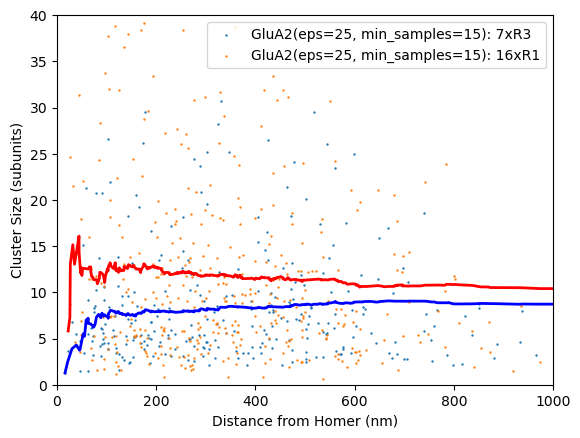

In [158]:
# Comparing sizes with GLUA2 7xR3 vs 16xR1
Param7xR3 = Params[4]
Param16xR1 = Params[4]

max_size = 40
filtered_GLUA2_7xR3_sizes = [size for size in GLUA2_7xR3_sizes[Param7xR3] if size < max_size]
filtered_GLUA2_7xR3_distances = [GLUA2_7xR3_distances[Param7xR3][i] for i in range(len(GLUA2_7xR3_distances[Param7xR3])) 
                                 if GLUA2_7xR3_sizes[Param7xR3][i] < max_size]
filtered_GLUA2_16xR1_sizes = [size for size in GLUA2_16xR1_sizes[Param16xR1] if size < max_size]
filtered_GLUA2_16xR1_distances = [GLUA2_16xR1_distances[Param16xR1][i] for i in range(len(GLUA2_16xR1_distances[Param16xR1])) 
                                 if GLUA2_16xR1_sizes[Param16xR1][i] < max_size]


print(f"Number of datapoints for 7xR3 (Param: {Param7xR3}): {len(filtered_GLUA2_7xR3_sizes)}")
print(f"Number of datapoints for 16xR1 (Param: {Param16xR1}): {len(filtered_GLUA2_16xR1_sizes)}\n")
sum = 0
for i in range(len(filtered_GLUA2_7xR3_sizes)):
    sum += filtered_GLUA2_7xR3_sizes[i]
print(f"Mean for 7xR3: {sum/len(filtered_GLUA2_7xR3_sizes)}")
print(f"Median for 7xR3: {statistics.median(filtered_GLUA2_7xR3_sizes)}")
print(f"SEOTM for 7xR3: {statistics.stdev(filtered_GLUA2_7xR3_sizes)/m.sqrt(len(filtered_GLUA2_7xR3_sizes))}\n")
sum = 0
for i in range(len(filtered_GLUA2_16xR1_sizes)):
    sum += filtered_GLUA2_16xR1_sizes[i]
print(f"Mean for 16xR1: {sum/len(filtered_GLUA2_16xR1_sizes)}")
print(f"Median for 16xR1: {statistics.median(filtered_GLUA2_16xR1_sizes)}")
print(f"SEOTM for 16xR1: {statistics.stdev(filtered_GLUA2_16xR1_sizes)/m.sqrt(len(filtered_GLUA2_16xR1_sizes))}")

window = 200
GLUA2_7xR3_average_distances, GLUA2_7xR3_average_sizes = moving_average(np.array(filtered_GLUA2_7xR3_distances), np.array(filtered_GLUA2_7xR3_sizes), window)
GLUA2_16xR1_average_distances, GLUA2_16xR1_average_sizes = moving_average(np.array(filtered_GLUA2_16xR1_distances), np.array(filtered_GLUA2_16xR1_sizes), window)

plt.figure()
plt.scatter(filtered_GLUA2_7xR3_distances, filtered_GLUA2_7xR3_sizes, s=0.5, label=f"{Param7xR3}: 7xR3")
plt.scatter(filtered_GLUA2_16xR1_distances, filtered_GLUA2_16xR1_sizes, s=0.5,  label=f"{Param16xR1}: 16xR1")

plt.plot(GLUA2_7xR3_average_distances, GLUA2_7xR3_average_sizes, color='blue', linestyle='-', linewidth=2)  # Plot the moving average line
plt.plot(GLUA2_16xR1_average_distances, GLUA2_16xR1_average_sizes, color='red', linestyle='-', linewidth=2)  # Plot the moving average line

plt.ylabel("Cluster Size (subunits)")
plt.xlabel("Distance from Homer (nm)")
plt.legend()

plt.ylim(0, 40)
plt.xlim(0, 1000)
plt.show()

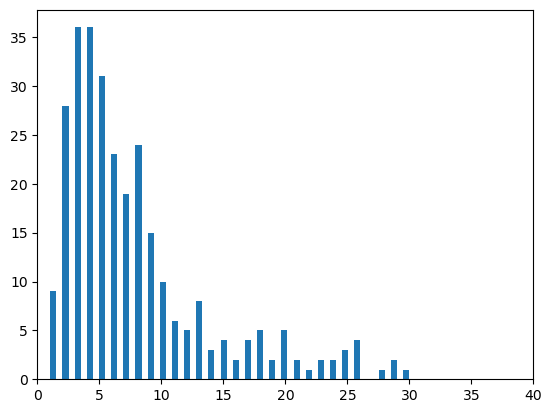

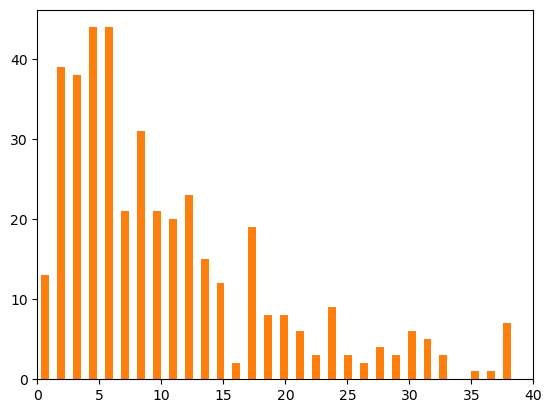

In [154]:
filtered_GLUA2_7xR3_sizes
filtered_GLUA2_16xR1_sizes

plt.figure()
plt.hist(filtered_GLUA2_7xR3_sizes, bins=30, align='left', rwidth=0.5)
plt.xlim(0, 40)
plt.show()
plt.figure()
plt.hist(filtered_GLUA2_16xR1_sizes, bins=30, align='left', rwidth=0.5, color="tab:orange")
plt.xlim(0, 40)
plt.show()

In [139]:
for FOV_list in FOVs:
    spine_list = []
    for FOV in FOV_list:
        spine_list.append(len(FOV.Spines))
    print(spine_list)

[8, 0, 2, 25, 10, 9, 32]
[11, 36, 2, 52, 16, 19]
[7, 19, 0, 23, 23, 25]
[12, 0, 3, 27, 7, 18, 48]


1/1 [==============================] - 0s 326ms/step
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


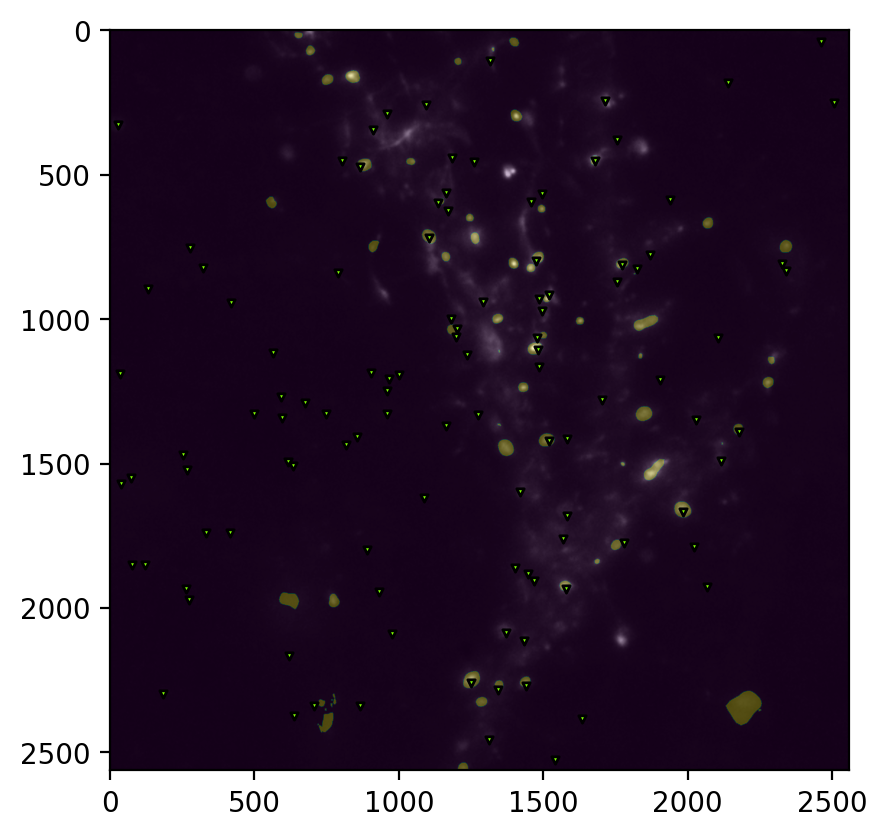

12


In [91]:
FOV = FOVs[3][0]
plt.figure(dpi=200)
plt.imshow(FOV.life_act, cmap='gray')
plt.imshow(FOV.deepd3_thresholding(deepd3_path, [512, 512], 500, 0.1)[1] > 0, alpha=0.3, cmap='viridis')
FOV.all_homer_centers.add_to_plot(s=7)
# cluster_centers = []
# for cluster in FOV.clustering_results[ClusterParam(25, 15, 'GluA2')]:
#     cluster_centers.append(cluster.cluster_center)
# cluster_centers = np.array(cluster_centers)
# plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=0.5)
plt.show()
print(len(FOV.Spines))

1/1 [==============================] - 0s 325ms/step
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


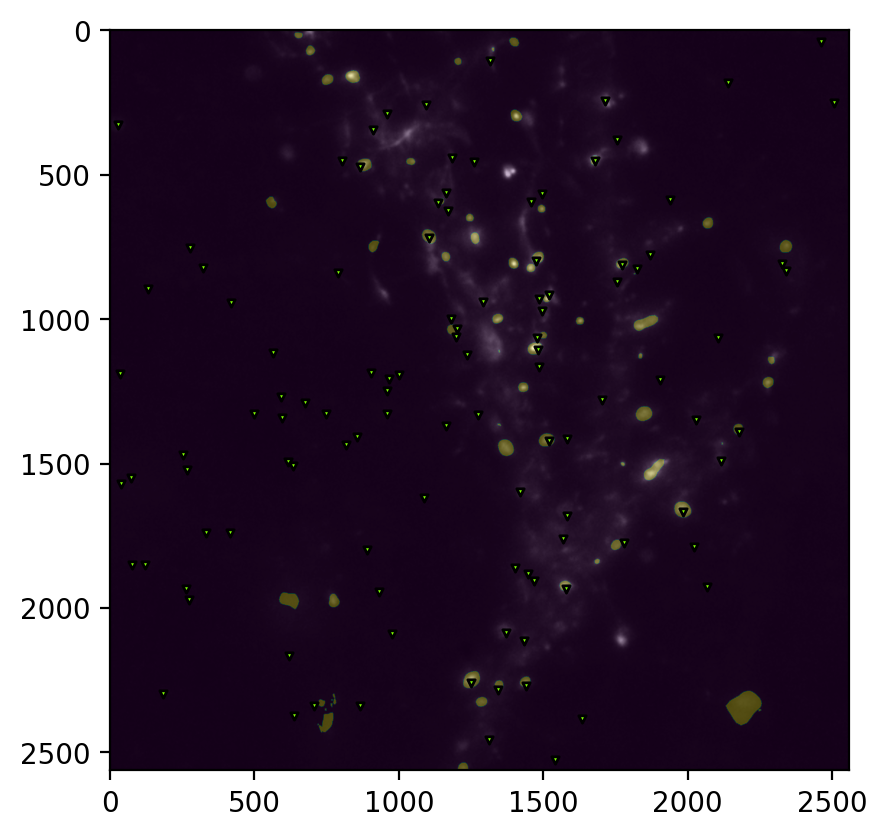

8


In [83]:
FOV = FOVs[0][0]
plt.figure(dpi=200)
plt.imshow(FOV.life_act, cmap='gray')
plt.imshow(FOV.deepd3_thresholding(deepd3_path, [512, 512], 500, 0.1)[1] > 0, alpha=0.3, cmap='viridis')
FOV.all_homer_centers.add_to_plot(s=7)
plt.show()
print(len(FOV.Spines))

In [2]:
nm_per_pixel = 21.34
time_per_frame = 0.1
Tau_D_GluA1 = 150.32
Tau_D_GluA2 = 97
background_threshold = 500
homer_path = '../Examples/A1_aHomer_corrected.csv'
life_act_path = '../Examples/A1_Composite.tif'
deepd3_path = 'DeepD3_32F.h5'
points = [['GluA1', r'../Examples/A1_GluA1_corrected.csv', 'white', time_per_frame, Tau_D_GluA1],
          ['GluA2', r'../Examples/A1_GluA2_corrected.csv', 'cyan', time_per_frame, Tau_D_GluA2]]
# Params = [ClusterParam(25, 25, 'GluA1'),
#           ClusterParam(25, 50, 'GluA1'),
#           ClusterParam(25, 75, 'GluA1'),
#           ClusterParam(25, 100, 'GluA1'),
#           ClusterParam(25, 15, 'GluA2'),
#           ClusterParam(25, 25, 'GluA2'),
#           ClusterParam(25, 50, 'GluA2'),
#           ClusterParam(25, 75, 'GluA2'),]
Params = [ClusterParam(25, 15, 'GluA2')]

# Params = [ClusterParam(80, 25, 'GluA1')]
FOV_A = FieldOfView(homer_centers=homer_path, 
                    life_act=life_act_path, 
                    nm_per_pixel=nm_per_pixel,
                    points=points, 
                    Params=Params, 
                    threshold=background_threshold,
                    deepd3_model_path=deepd3_path,
                    deepd3_pred_thresh=0.3)

Loading Life Act...
Setting up Thresholding...
1/1 [==============================] - 2s 2s/step
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Loading Homer Centers...
Loading GluA1...
Loading GluA2...
Finding Clusters for: GluA2(eps=25, min_samples=15)...
Found 5063 Clusters
Filtering Bad Spines...


In [3]:
sizes = FOV_A.get_all_cluster_sizes(Params[0])
# print(sizes)
print(len(sizes))
areas = FOV_A.get_all_cluster_areas(Params[0])
# print(areas)
print(len(areas))
densities = FOV_A.get_all_cluster_densities(Params[0])
# print(densities)
print(len(densities))
distances_to_homer = FOV_A.get_all_distances_to_homer(Params[0], max_dark_time=500)
# print(distances_to_homer)
print(len(distances_to_homer))

136
136
136
136


In [14]:
def moving_average(x, y, window_size):
    """
    Calculate the moving average of the y-values, using a given window size.
    """
    # Sort x and y by x-values
    sorted_indices = np.argsort(x)
    x_sorted = x[sorted_indices]
    y_sorted = y[sorted_indices]

    # Compute moving averages
    moving_averages = []
    moving_averages_x = []

    # Use a deque (double-ended queue) to store the values in the current window
    from collections import deque
    window = deque(maxlen=window_size)  # Only holds `window_size` number of elements

    # Use the index of the sorted x-values to iterate and calculate the moving average
    for i in range(len(x_sorted)):
        # Append the next y-value to the window
        window.append(y_sorted[i])

        # Calculate the mean of the current window
        window_mean = np.mean(window)

        # Store the moving average and corresponding x-value
        moving_averages.append(window_mean)
        moving_averages_x.append(x_sorted[i])

    return moving_averages_x, moving_averages

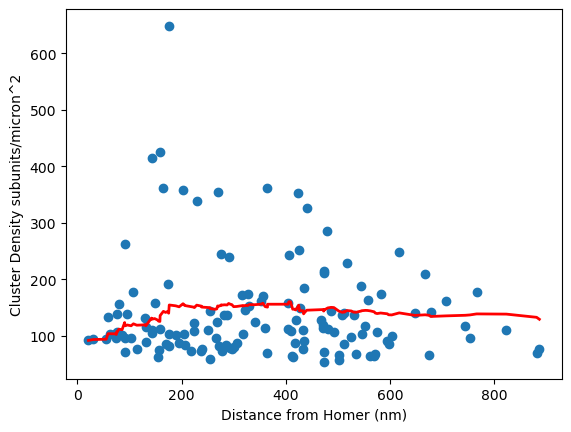

In [29]:
from matplotlib import pyplot as plt
distances_to_homer = FOV_A.get_all_distances_to_homer(Params[0], max_dark_time=500)
densities = FOV_A.get_all_cluster_densities(Params[0])

greatest_density = 1000
distances_to_homer = [distances_to_homer[i] for i in range(len(distances_to_homer)) if densities[i] < greatest_density]
densities = [densities[i] for i in range(len(densities)) if densities[i] < greatest_density]

window = 50
average_distances, average_densities = moving_average(np.array(distances_to_homer), np.array(densities), window)

plt.figure()
plt.scatter(distances_to_homer, densities)
plt.plot(average_distances, average_densities, color='r', linestyle='-', linewidth=2)  # Plot the moving average line
plt.ylabel("Cluster Density subunits/micron^2")
plt.xlabel("Distance from Homer (nm)")
plt.show()

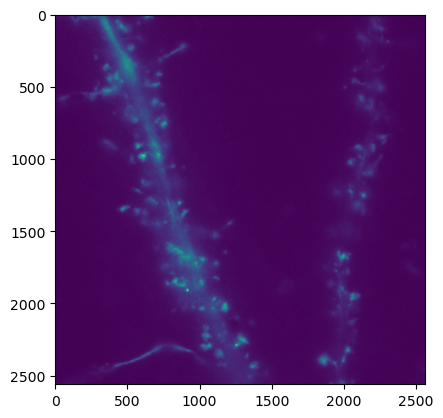

In [30]:
plt.imshow(FOV_A.life_act)

In [4]:
FOV_A.write_clusters_to_csv(filename="Cluster.csv", Tau_D=97, 
                            Params=Params, max_dark_time=500)

Cluster.csv created successfully!
